[Indice](index.ipynb) | Previo: [RelatividadEspecial.TransformacionesLorentzEinstein.Propiedades](01.02.01.00.RelatividadEspecial.TransformacionesLorentzEinstein.Propiedades.ipynb) | Siguiente: [RelatividadEspecial.TransformacionesLorentzEinstein.Consecuencias](01.02.03.00.RelatividadEspecial.TransformacionesLorentzEinstein.Consecuencias.ipynb)

### 1.8.7. El valor del factor de Lorentz-Einstein
<a id='valor_gama'></a>

Las TLE dependen del valor de $u_L$ y del factor de Lorentz $\gamma$.  Es importante familiarizarse con el valor de estas cantidades.

La primera propiedad importante es que $u_L<1$ y por lo tanto $\gamma\geq1$.   Ahora bien para velocidades comunes (la velocidad de un vehículo, un avión, un planeta, incluso una estrella o una galaxia), $u_L\ll 1$.  Por la misma razón entonces el factor se puede expandir usando el teorema del binomio o una serie de Taylor.  

Para ello nos valdremos aquí del paquete `SymPy` que usaremos con frecuencia en lo sucesivo:

In [22]:
import sympy as sp

#Se definen los símbolos que usaremos
u=sp.symbols("u")

#Todas las funciones especiales (ej. raíz o sqrt) deben tomarse de sympy
gamma=1/sp.sqrt(1-u**2)

In [23]:
gamma

1/sqrt(1 - u**2)

Una vez definida la función podemos pedir a `SymPy` que haga la expansión en series de Taylor:

In [24]:
sp.diff(gamma,u)

u/(1 - u**2)**(3/2)

In [25]:
sp.integrate(gamma,u)

asin(u)

In [26]:
sp.integrate(gamma,(u,0,0.5))

0.523598775598299

In [28]:
sp.series(gamma,n=16)

1 + u**2/2 + 3*u**4/8 + 5*u**6/16 + 35*u**8/128 + 63*u**10/256 + 231*u**12/1024 + 429*u**14/2048 + O(u**16)

Reteniendo solo los términos de orden cuadrático en $u_L$ nos queda:

$$
\gamma=\frac{1}{\sqrt{1-u_L^2}}=1+\frac{u_L^2}{2}+{\cal O}(u_L^4)
$$
o lo que es lo mismo:

$$
\gamma-1=\frac{u_L^2}{2}+{\cal O}(u_L^4)
$$

Como se ve en esta última expresión, es más fácil calcular $\gamma-1$ que $\gamma$ mismo.

Un gráfico del factor de Lorentz como función de la fracción $u_L$ se muestra en la figura abajo.

In [29]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


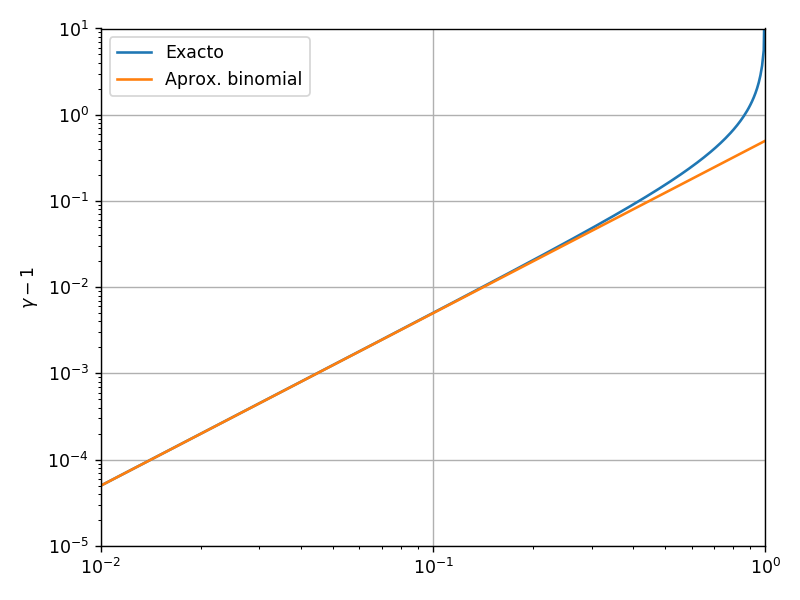

In [30]:
from numpy import log10,sqrt,logspace

#Rango de valores
us=logspace(log10(1e-5),log10(0.9999),1000)

#Gama-1 exacto
gammas=1/sqrt(1-us**2)-1

#Gama-1 aproximado
gamma_approx=us**2/2

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

ax.plot(us,gammas,label='Exacto')
ax.plot(us,gamma_approx,label='Aprox. binomial')

#Ejes
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim((1e-2,1e0))
ax.set_ylim((1e-5,1e1))

#Decoración
ax.set_label(r"$u/c$")
ax.set_ylabel(r"$\gamma-1$")
ax.legend()
ax.grid()
fig.tight_layout()

<a id='fig:01.02.02.00.RelatividadEspecial.TransformacionesLorentzEinstein.Numericas_1'></a><center><b>Figura 1.1.</b> </center>

Nótese que la aproximación $\gamma-1\approx u_L^2/2$ es suficientemente bueno (error relativo menor a $\sim 1\%$) hasta $u_L\approx 0.2$ 

### 1.8.8. Mapas de la TLE
<a id='TLE_mapas'></a>

Como hemos visto las TLE definen un conjunto de reglas en las que dadas las cantidades cinemáticas básicas (tiempo y posición) medidas por ejemplo por un observador inercial $O'$ (que tiene velocidad $\vec u$ respecto a otro observador inercial $O$), podemos calcular los valores de las mismas cantidades cinemáticas medida por $O$, usando la regla matricial:

$$
\tilde x = \Lambda(-\vec{u}) \tilde x'
$$
donde $\Lambda(\vec{u})$ es la matriz general de las TLE (Ecs. [TLE_generales](#mjx-eqn-eq%3ATLE_generales)).  ¿Cómo representar gráficamente esta transformación?.

> **Nota: Sistemas de referencia del Viajero y del Laboratorio.**<a id=''></a> La elección de cuál es el observador primado y cuál es el no primado en relatividad es completamente arbitraria y simétrica.  Esta idea esta en el corazón mismo de los postulados de la teoría. Sin embargo, conceptualmente, la elección apropiada de uno u otro, puede llegar a ser muy importante para ilustrar las consecuencias de las TLE.  

> En lo sucesivo llamaremos al sistema primado **sistema de referencia del viajero**, **observador viajero** o simplemente el **Viajero** (con mayúscula inicial).  Aunque la palabra viajero da a entender que tiene un estado de movimiento absoluto, esta elección simplemente refleja la importancia que daremos a las medidas del *Observador* que se define a continuación.  Este sistema de referencia puede estar atado a una partícula, a una nave o a un sistema físico que observamos.  Es interesante anotar que no en todos los ejemplos el observador viajero $O'$ necesariamente será inercial.

> El observador no primado y al que llamaremos aquí el **sistema de referencia del laboratorio** o simplemente **el Laboratorio** (con mayúscula inicial), será cualquier sistema en el Universo donde se quiere saber el valor de aquellas cantidades físicas medidas por el Viajero, pero en términos de las coordenadas locales.  

> Normalmente quién estudia un fenómeno en relatividad se considera así mismo el Laboratorio, de modo que las etiquetas de Viajero y Laboratorio pueden intercambiarse.

> En lo sucesivo daremos las observaciones del Viajero (sistema primado), como fuente de muchos de los datos físicos primarios (en este sentido este observador se comporta como el experimentador que se pone en una situación incómoda para estudiar el mundo), hará que sea mucho más común usar las TLE inversas:

$$\Lambda^{\nu}_{\mu'}(u)=\Lambda^{\mu'}_{\nu}(-\vec u)$$
> en lugar de las transformaciones originales, es decir de aquellas que nos dan las observaciones del Laboratorio en función de las del Viajero.

Para ello comencemos por definir una rutina que nos permita calcular los elementos de la matriz $\Lambda$ dado cualquier valor de la velocidad relativa $\vec u$, siempre en unidades luz.  Debemos implementar las transformaciones:

$$
{\Lambda^{0'}}_0=\gamma\\
{\Lambda^{0'}}_i={\Lambda^{i'}}_0=-\gamma u_L^i\\
{\Lambda^{i'}}_j=\delta_{ij}+(\gamma-1)u_L^i u_L^j / u_L^2\\
$$

<a id='code:TLE'></a>

In [31]:
from numpy import zeros
def Lambda_TLE(u):
    """
    Calcula la matriz de transformación de Lorentz-Einstein 
    para una velocidad relativa arbitraria.
    
    Entradas:
       u (arreglo de 4 dimensiones): velocidad relativa
    
    Salidas:
       Lambda (matriz de 4x4): TLE.
    """
    Lambda=zeros((4,4))
    
    #Factor de Lorentz
    umag=(u[0]**2+u[1]**2+u[2]**2)**0.5
    gamma=(1-umag**2)**(-0.5)
    
    #Lambda
    Lambda[0,0]=gamma
    Lambda[0,1:]=-u*gamma
    Lambda[1:,0]=-u*gamma
    for i in range(1,4):
        for j in range(1,4):
            dij=0
            if i==j:dij=1
            #i-1,j-1 en la velocidad porque sus índices empiezan en 0
            Lambda[i,j]=dij+(gamma-1)*u[i-1]*u[j-1]/umag**2
    
    return Lambda

Construyamos por ejemplo una transformación del observador viajero al observador del laboratorio escogiendo una velocidad en la dirección de $x$ (configuración estándar):

In [32]:
from numpy import array
u=array([0.5,0.0,0.0])
Lambda=Lambda_TLE(-u)

In [33]:
print(f"Lambda (u = {u}) = \n{Lambda}")

Lambda (u = [0.5 0.  0. ]) = 
[[1.15470054 0.57735027 0.         0.        ]
 [0.57735027 1.15470054 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]


Para visualizar las TLE construyamos una red (*grid*) de eventos en el espacio-tiempo de $O'$.  Las filas de esta red serán eventos que ocurren en el mismo lugar $x'$ del espacio (un lugar diferente para cada fila) y las columnas representan eventos que tienen el mismo valor $t'$, es decir, eventos simultáneos para $O'$.

In [34]:
#Red de valores de t' y x'
from numpy import linspace
rmax=10
xps=linspace(0,rmax,rmax+1,endpoint=True)
tps=linspace(0,rmax,rmax+1,endpoint=True)

Calculemos y grafiquemos los valores correspondientes de las posiciones y velocidades de esos mismos eventos medidos por el observador en el laboratorio usando la transformación $\tilde x = \Lambda(-\vec u)\tilde x'$:

<IPython.core.display.Javascript object>


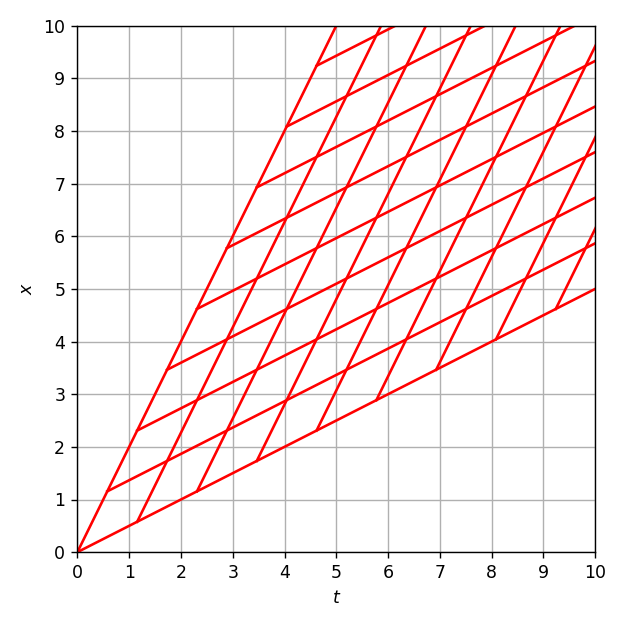

In [35]:
#Iniciamos en cero los valores
from numpy import zeros_like
ts=zeros_like(tps)
xs=zeros_like(xps)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

#Por cada fila calculamos los valores de t,x y graficamos el resultado
from numpy import matmul
for xp in xps:
    for i,tp in enumerate(tps):
        ts[i],xs[i],y,z=matmul(Lambda,[tp,xp,0,0])
    ax.plot(ts,xs,'r-')

#Por cada columna calculamos los valores de t,x y graficamos el resultado
for tp in xps:
    for i,xp in enumerate(xps):
        ts[i],xs[i],y,z=matmul(Lambda,[tp,xp,0,0])
    ax.plot(ts,xs,'r-')

#Decoración
ax.set_xticks(xps)
ax.set_yticks(xps)
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.set_xlim((0,rmax))
ax.set_ylim((0,rmax))
ax.grid()
fig.tight_layout()

<a id='fig:01.02.02.00.RelatividadEspecial.TransformacionesLorentzEinstein.Numericas_2'></a><center><b>Figura 1.2.</b> </center>

Un vistazo a este resultado nos revela inmediatamente las consecuencias mejor conocidas y más sorpredentes de las TLE (y de la relatividad Einsteiniana en general):

- **Relatividad de la simultaneidad**.  Los eventos que escogimos como simultáneos para el observador viajero (columnas de la malla roja) en el sistema de referencia del laboratorio no lo son. 

- **Dilatación del tiempo**. Nótese que la escala de la malla también cambio.  La separación entre las líneas verticales en el sistema del laboratorio (que definiría lo que llamaríamos la duración de un fenómeno) es menor que la misma separación de las líneas de igual tiempo en el sistema viajero.  Esto implica que cualquier fenómeno que mida el observador viajero y que mida para él un tiempo dado, tendrá una duración mayor medida en el sistema del laboratorio.  Llamamos a ese efecto la dilatación del tiempo.

En las siguientes secciones discutiremos en detalle ambos efectos.

Para una versión interactiva del mapa de las TLE vea la [versión electrónica de este libro](http://github.com/seap-udea/Relatividad-Zuluaga).

En el siguiente gráfico interactivo podemos comprobar los efectos que tiene cada componente de la velocidad relativa sobre el mapa de las TLE.

Para hacerlo debemos primero colocar en una misma rutina todos los comandos que usamos en los procedimientos que usamos anteriormente.

<a id='code:mapa_TLE'></a>

In [20]:
def mapa_TLE(ux=0.0,uy=0.0,uz=0.0,
             rmax=10,ngrid=10,nticks=10,
             interact=False):
    from numpy import array
    u=array([ux,uy,uz])
    Lambda=Lambda_TLE(-u)
    
    #Red de valores de t' y x'
    from numpy import linspace
    xps=linspace(0,rmax,nticks+1,endpoint=True)
    tps=linspace(0,rmax,nticks+1,endpoint=True)

    #Iniciamos en cero los valores
    from numpy import zeros_like
    ts=zeros_like(tps)
    xs=zeros_like(xps)

    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(4,4))
    ax=fig.gca()

    #Por cada fila calculamos los valores de t,x y graficamos el resultado
    from numpy import matmul
    for xp in xps:
        for i,tp in enumerate(tps):
            ts[i],xs[i],y,z=matmul(Lambda,[tp,xp,0,0])
        ax.plot(ts,xs,'r-')

    #Por cada columna calculamos los valores de t,x y graficamos el resultado
    for tp in xps:
        for i,xp in enumerate(xps):
            ts[i],xs[i],y,z=matmul(Lambda,[tp,xp,0,0])
        ax.plot(ts,xs,'r-')

    #Decoración
    ax.set_xticks(xps)
    ax.set_yticks(xps)
    ax.set_xlabel("$t$")
    ax.set_ylabel("$x$")
    ax.set_xlim((0,rmax))
    ax.set_ylim((0,rmax))
    ax.grid()
    fig.tight_layout()
    if not interact:
        return fig

A continuación se proveen los comandos para construir el gráfico interactivo.

In [21]:
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)
interact(mapa_TLE,
         ux=widgets.FloatSlider(value=1e-3,min=1e-3,max=0.99,step=0.01,**opciones),
         uy=widgets.FloatSlider(value=0.0,min=0.0,max=0.99,step=0.01,**opciones),
         uz=widgets.FloatSlider(value=0.0,min=0.0,max=0.99,step=0.01,**opciones),
         rmax=fixed(10),ngrid=fixed(10),interact=fixed(True)
        );

interactive(children=(FloatSlider(value=0.001, continuous_update=False, description='ux', max=0.99, min=0.001,…

<a id='fig:01.02.02.00.RelatividadEspecial.TransformacionesLorentzEinstein.Numericas_3'></a><center><b>Figura 1.3.</b> </center>

Intente:

- Visualizar el efecto que tiene la variación solo de `ux`. 
- Visualizar el efecto que tiene la variación solo de `uy` o `uz`. 
- Pruebe cambiando simultáneamente dos de esos valores.

[Indice](index.ipynb) | Previo: [RelatividadEspecial.TransformacionesLorentzEinstein.Propiedades](01.02.01.00.RelatividadEspecial.TransformacionesLorentzEinstein.Propiedades.ipynb) | Siguiente: [RelatividadEspecial.TransformacionesLorentzEinstein.Consecuencias](01.02.03.00.RelatividadEspecial.TransformacionesLorentzEinstein.Consecuencias.ipynb)